# A Brief Introduction to Pandas

This is based on my own limited notes on how to use Pandas. There is excellent documentation available at the [Pandas website.](https://pandas.pydata.org/pandas-docs/stable/index.html). This includes a very good [Getting Started guide.](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)
I hope this notebook will be helpful to get you started with this package, and then allow you to delve deeper into Pandas as needed using the online documentation. 

Pandas is a "high-performance, easy-to-use data structures and data analysis tools for the Python programming language". In layperson's terms, it is a package to make various data sources (Excel spreadsheet, database, web site source, etc) easily accessible in Python, and it then allows you to use that data in your code in a convenient and fast way.

We start importing the package, and we also import Numpy, since these two work well together.

In [1]:
import numpy as np
import pandas as pd
print("Pandas version: ",pd.__version__)

Pandas version:  0.25.1


## DataFrame and Series

The data in pandas is stored in a `pd.Series` (for an index and a single value) or a `pd.DataFrame`, for an index and multiple columns of data. Most of the time you will create a DataFrame. The Series will come up when you are doing something with that DataFrame that returns a single column of the data.

Just so we have something to work with, we create some fake data. To make it more interesting, we use an index that is dates. After creating the data, it is useful to see what it looks like. Printing the `head()`, will give the names of the columns, and a few rows of the data.

In [2]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df.head()

,A,B,C,D
2013-01-01,-0.008067,-1.154796,0.097711,-0.552067
2013-01-02,-1.501984,0.582437,-0.841192,-0.534488
2013-01-03,1.544993,0.791356,0.176323,-0.241245
2013-01-04,-0.071809,-0.355648,0.340825,-0.836713
2013-01-05,0.775796,0.231948,-0.491391,0.454042


To print a table, you can just use just `print(df)`. If you want it formatted nicely, you can use the HTML formatter. The quick way to get that result is to simply end a cell with the object you are trying to print.

In [3]:
print(df)
print("This was a table printed directly, as it will look in a terminal.")

                   A         B         C         D
2013-01-01 -0.008067 -1.154796  0.097711 -0.552067
2013-01-02 -1.501984  0.582437 -0.841192 -0.534488
2013-01-03  1.544993  0.791356  0.176323 -0.241245
2013-01-04 -0.071809 -0.355648  0.340825 -0.836713
2013-01-05  0.775796  0.231948 -0.491391  0.454042
2013-01-06  0.545269 -0.750194 -0.664234 -1.050872
This was a table printed directly, as it will look in a terminal.


In [4]:
# Print fancy. Printing this way allows statements to appear after the table.
from IPython.display import display, HTML
display(HTML(df.to_html()))
print("This is the pretty table again, displayed in a different way.")

,A,B,C,D
2013-01-01,-0.008067,-1.154796,0.097711,-0.552067
2013-01-02,-1.501984,0.582437,-0.841192,-0.534488
2013-01-03,1.544993,0.791356,0.176323,-0.241245
2013-01-04,-0.071809,-0.355648,0.340825,-0.836713
2013-01-05,0.775796,0.231948,-0.491391,0.454042
2013-01-06,0.545269,-0.750194,-0.664234,-1.050872


This is the pretty table again, displayed in a different way.


In [5]:
# Or just have the table be the last item on the cell, which will also give a 
#formatted view if used in a notebook.
df

,A,B,C,D
2013-01-01,-0.008067,-1.154796,0.097711,-0.552067
2013-01-02,-1.501984,0.582437,-0.841192,-0.534488
2013-01-03,1.544993,0.791356,0.176323,-0.241245
2013-01-04,-0.071809,-0.355648,0.340825,-0.836713
2013-01-05,0.775796,0.231948,-0.491391,0.454042
2013-01-06,0.545269,-0.750194,-0.664234,-1.050872


If you want to see just the row names, or the columns names, you can find them in `df.index`, or `df.columns`.

In [6]:
print(df.index)
print(df.columns)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


## Accessing the data

The whole point of a data management package is to make the content of the data easily accessible. In Pandas there are 3 different ways to do this, depending on what you are trying get.

### Getting a column of data

Getting an entire column is something you often want to do, for instance to make a plot, so this is made very straight forward. You get a column using the column name as argument to the `[]` operator. If you want multiple columns, you use give a list of the columns you want.

In [7]:
df['A']

2013-01-01   -0.008067
2013-01-02   -1.501984
2013-01-03    1.544993
2013-01-04   -0.071809
2013-01-05    0.775796
2013-01-06    0.545269
Freq: D, Name: A, dtype: float64

In [8]:
df[['A','C']]

,A,C
2013-01-01,-0.008067,0.097711
2013-01-02,-1.501984,-0.841192
2013-01-03,1.544993,0.176323
2013-01-04,-0.071809,0.340825
2013-01-05,0.775796,-0.491391
2013-01-06,0.545269,-0.664234


Note that what is returned in the first case is a `pandas.Series`, while in the second case you get a `pandas.DataFrame`, which then gets printed in the pretty format automatically. Hint: if you want the first one to print pretty, turn it into a dataframe, either `pd.DataFrame(df['A'])`, which explicitly turns it into a data frame, or `df[['A']]` will also do the same.

## Reading data

One of the strengths of Pandas is the number of data storage types it supports. This includes text, comma separated, Excel spreadsheet, databases, HDF5, JSON and webpages. Here I will just show you the simplest and most used ones, and leave the other formats for you to explore on your own.

Often you will want to read a CSV file which was written out by a data source (Analog Discovery or other data acquisition system). These files will often have comments in them which you will need to skip. You can specify the comment character (often '#') or you can explicitly skip a set number of rows, i.e. `skiprows=4` will skip the first 4 rows. 

After you read in the file, check that the data makes sense by printing the first few lines. This will also indicate the names of the columns.

In [9]:
my_data = pd.read_csv("IV_curve_1N5226BF_3.csv",comment='#')
my_data.head()

,Time (s),Channel 1 (V),Channel 2 (V)
0,-0.517044,0.818018,2.917983
1,-0.516918,0.818018,2.917983
2,-0.516792,0.818018,2.917983
3,-0.516665,0.818354,2.917983
4,-0.516539,0.818354,2.917983


If you don't like the names of the columns, you can rename them by setting the `DataFrame.column` array:


In [10]:
my_data.columns=['time','ch1','ch2']
my_data.head()

,time,ch1,ch2
0,-0.517044,0.818018,2.917983
1,-0.516918,0.818018,2.917983
2,-0.516792,0.818018,2.917983
3,-0.516665,0.818354,2.917983
4,-0.516539,0.818354,2.917983


It is now easy to plot the columns. Here is a plot of channel 2, converted to current, versus channel 1.

In [11]:
import matplotlib.pyplot as plt
plt.plot(my_data['ch1'],my_data['ch2']/220)

The plot does not look correct! The straight diagonal line should not be there, this is matplotlib connecting the last point of one sweep through the data to the first point of the next sweep. We need to clean up our data to get a better plot, without the spurious line.

Knowing what is in the data is important here. In this case, the data in channel 1 went from a minimum to a maximum value due to a function generator that produced a 'sawtooth' ramp signal. One sweep means going from the minimum to the maximum. We only want to select a single sweep, and can do so by finding the location of the first minimum with `.idxmin()` (note that `.min()` gives the *value* of the minimum, whereas `.idx` gives the index where that value occurs), and likewise the location of the maximum with `.idxmax()`. We should also properly label the plot (see the Intro_Plotting notebook.)

Text(0.5, 1.0, 'I-V curve of 3.3 V zener forward biased')

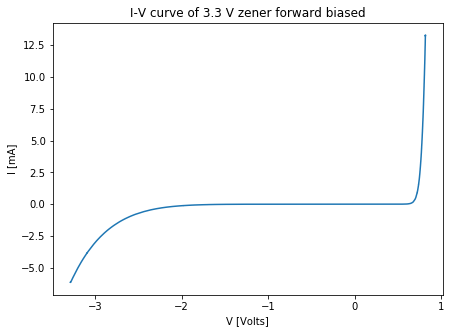

In [12]:
good_data = my_data.loc[my_data['ch1'].idxmin():my_data['ch1'].idxmax()] # Select one sweep of data.'
fig = plt.figure(figsize=(7,5))
plt.plot(good_data['ch1'],1000.*good_data['ch2']/220) # now plot the data
plt.xlabel('V [Volts]')
plt.ylabel('I [mA]')
plt.title('I-V curve of 3.3 V zener forward biased')

## Writing data

It is reasonable to now want to write a file with this filtered data, so you can use it later or you can use it in a different application. In this case, I will write the data to an Excel spreadsheet. Doing this if simple:

In [13]:
good_data.to_excel('Zener_curve_data.xlsx')

This following command is not Python! It is a notebook magic command that allows me to list the directory, and so see that the file was indeed written.

In [14]:
%ls *.xlsx

Zener_curve_data.xlsx  gauss.xlsx


## Going further

This was just a very minimal way to look at some things you can do with Pandas. If you are interested in learning more, please go to the tutorial and learn all the useful things you can do with your data once it is in Pandas.